In [1]:
sc

In [3]:
docs = sc.textFile('/Users/adrianopagano/Desktop/Big_Dive/BigDive5/Data/reddit_2014-12-10k.json')

In [4]:
docs.take(1)

[u'{"created_utc":"1417392000","subreddit_id":"t5_2r9po","link_id":"t3_2nvxfv","id":"cmhems8","author":"eror11","score_hidden":false,"body":"Is he the joey? ","edited":false,"archived":false,"name":"t1_cmhems8","retrieved_on":1425748675,"author_flair_css_class":null,"ups":3,"controversiality":0,"score":3,"subreddit":"Guildwars2","author_flair_text":null,"parent_id":"t1_cmhe1zw","distinguished":null,"gilded":0,"downs":0}']

In [5]:
import json

In [53]:
docs.map(json.loads).map(lambda x: x['body']).take(2)

[u'Is he the joey? ', u"yes\nmessage me again when you're online\n"]

In [7]:
import re

pattern = '(?u)\\b[A-Za-z]{3,}'

In [8]:
docs.map(json.loads)\
    .map(lambda x: x['body']) \
    .flatMap(lambda x: re.findall(pattern, x))\
    .map(lambda x: (x.lower(), 1))\
    .reduceByKey(lambda x,y: x+y)\
    .map(lambda (a, b): (b, a))\
    .sortByKey(ascending=False)\
    .take(10)

[(9874, u'the'),
 (5354, u'and'),
 (4449, u'you'),
 (3843, u'that'),
 (2478, u'for'),
 (1865, u'this'),
 (1783, u'have'),
 (1756, u'but'),
 (1721, u'with'),
 (1592, u'not')]

In [40]:
total_subreddit = set(docs.map(json.loads).map(lambda x: x['subreddit']).collect())
topics_serious = ['philosophy', 'history', 'politics', 'science']
topics_funny = ['funny', 'memes', 'humour', 'comic']
subreddit_serious= []
subreddit_funny= []
for sub in total_subreddit:
    for i, topic in enumerate(topics_serious):
        if topic in sub or topic.upper() in sub.upper():
            subreddit_serious.append(sub)
    for i, topic in enumerate(topics_funny):
        if topic in sub or topic.upper() in sub.upper():
            subreddit_funny.append(sub)
print subreddit_serious, subreddit_funny
print 'Number of serious subreddits: ' + str(len(subreddit_serious))
print 'Number of funny subreddits :' +str(len(subreddit_funny))

[u'HistoryPorn', u'EverythingScience', u'askscience', u'CanadaPolitics', u'worldpolitics', u'ukpolitics', u'shittyaskscience', u'badpolitics', u'scienceofdeduction', u'politics', u'askphilosophy', u'science', u'history', u'AskScienceFiction', u'fuckingphilosophy', u'philosophy', u'gunpolitics', u'AskSocialScience'] [u'sadcomics', u'comiccodes', u'comicbooks', u'terriblefacebookmemes', u'DCcomics', u'MetalMemes', u'NSFWFunny', u'comicbookmovies', u'IncestComics', u'funnycharts', u'funny', u'MemesIRL', u'Afwcomics', u'FunnyandSad']
Number of serious subreddits:18
Number of funny subreddits :14


In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


(0, 25)

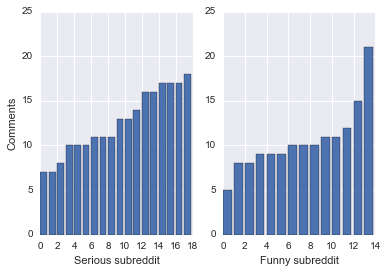

In [52]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn

num_serious = docs.map(json.loads)\
    .filter(lambda x: x['subreddit'] in subreddit_serious) \
    .map(lambda x: (x['subreddit'], 1)) \
    .groupByKey() \
    .map(lambda pair: len(pair[0]))\
    .collect()

num_funny = docs.map(json.loads)\
    .filter(lambda x: x['subreddit'] in subreddit_funny) \
    .map(lambda x: (x['subreddit'], 1)) \
    .groupByKey() \
    .map(lambda pair: len(pair[0]))\
    .collect()

fig, ax = plt.subplots(1,2)
ax[0].bar(range(len(num_serious)), sorted(num_serious))
ax[1].bar(range(len(num_funny)), sorted(num_funny))
ax[0].set_xlabel('Serious subreddit')
ax[1].set_xlabel('Funny subreddit')
ax[0].set_ylabel('Comments')
ax[0].set_ylim([0,25])

(0, 120)

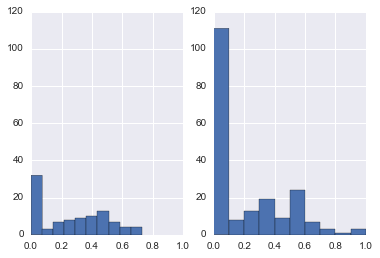

In [83]:
import re

re_punct = re.compile('[,\';:]')
re_word = re.compile('([^\w\s]|\d+)')

def punct(x):
    try:
        return len(re.findall(re_punct, x))/(float(len(re.findall(re_word, x))))
    except ZeroDivisionError:
        return 0

punct_serious = docs.map(json.loads)\
    .filter(lambda x: x['subreddit'] in subreddit_serious) \
    .map(lambda x:  x['body']) \
    .map(punct) \
    .collect()

punct_funny = docs.map(json.loads)\
    .filter(lambda x: x['subreddit'] in subreddit_funny) \
    .map(lambda x:  x['body']) \
    .map(punct) \
    .collect()

fig, ax = plt.subplots(1,2)
ax[0].hist(punct_serious)
ax[1].hist(punct_funny)
ax[0].set_xlim([0,1.0])
ax[0].set_ylim([0,120])